In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/733proj')

Mounted at /content/gdrive


In [6]:
cd 733proj

/content/gdrive/MyDrive/Colab Notebooks/733proj


In [7]:
airbnb_df=pd.read_csv("listings.csv")

airbnb_df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20221206172219,2022-12-07,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
1,8077,https://www.airbnb.com/rooms/8077,20221206172219,2022-12-06,city scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.04
2,26654,https://www.airbnb.com/rooms/26654,20221206172219,2022-12-07,city scrape,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,...,4.75,4.85,4.65,NaN,f,3,3,0,0,0.28


In [8]:
print(airbnb_df['bedrooms'].isnull().sum())
print(airbnb_df['bathrooms_text'].isnull().sum())
print(airbnb_df['review_scores_rating'].isnull().sum())
print(airbnb_df['reviews_per_month'].isnull().sum())

980
6
4157
4157


Let's take a look at some variables that can affect customers choice

In [30]:
df = pd.DataFrame()
airbnb_df = airbnb_df.dropna(subset=['bedrooms'])
airbnb_df = airbnb_df.dropna(subset=['bathrooms_text'])
airbnb_df = airbnb_df.dropna(subset=['review_scores_rating'])
airbnb_df = airbnb_df.dropna(subset=['reviews_per_month'])

df['name'] = airbnb_df.apply(lambda x: x['name'], axis = 1)
df['price'] = airbnb_df.apply(lambda x: x['price'],axis = 1)
df['neighbourhood'] = airbnb_df.apply(lambda x: x['neighbourhood_cleansed'], axis = 1)
df['type'] = airbnb_df.apply(lambda x: x['property_type'], axis = 1)
df['bedrooms'] = airbnb_df.apply(lambda x: x['bedrooms'], axis = 1)  
df['bathrooms'] = airbnb_df.apply(lambda x: x['bathrooms_text'], axis = 1)
df['scores'] = airbnb_df.apply(lambda x: x['review_scores_rating'], axis = 1)
df['monthly_review'] = airbnb_df.apply(lambda x: x['reviews_per_month'], axis = 1)
display(df)

,name,price,neighbourhood,type,bedrooms,bathrooms,scores,monthly_review
0,Beautiful home in amazing area!,469.0,Little Portugal,Entire home,5.0,3 baths,5.00,0.08
1,Downtown Harbourfront Private Room,101.0,Waterfront Communities-The Island,Private room in rental unit,1.0,1.5 baths,4.84,1.04
2,World Class downtown @CN Tower Theatre MTCC ga...,125.0,Waterfront Communities-The Island,Entire condo,1.0,1 bath,4.78,0.28
4,Calming Bedroom 2 - Beaches Toronto,37.0,Woodbine Corridor,Private room in home,1.0,1 shared bath,5.00,0.18
6,Calming Bedroom 3 - Beaches Toronto,37.0,Woodbine Corridor,Private room in home,1.0,1 shared bath,4.89,0.08
...,...,...,...,...,...,...,...,...
16575,Delux City Escape Penthhouse - The grand Lake ...,229.0,Waterfront Communities-The Island,Entire rental unit,1.0,1 bath,5.00,1.00
16577,Cn tower views 1+ den,166.0,Waterfront Communities-The Island,Entire rental unit,1.0,1 bath,4.50,2.00
16602,London,61.0,Kingsview Village-The Westway,Private room in home,1.0,1.5 baths,5.00,1.00
16617,2Bdr Apt direct access to Metro,186.0,Lansing-Westgate,Entire rental unit,2.0,2 baths,5.00,1.00


In [31]:
print(df['price'])

0        469.0
1        101.0
2        125.0
4         37.0
6         37.0
         ...  
16575    229.0
16577    166.0
16602     61.0
16617    186.0
16644    122.0
Name: price, Length: 11833, dtype: float64


# **Discriptive Analysis**

The correlation we might need to analyze:
 
1.   frequency (top listing, neighbourhood, roomtype, price ranges, etc.)
2.   monthly review
4.   scores


Variables Frequency Distribution Tables

What are the top listing hosts in Great Toronto area?

In [11]:
top_host_init = pd.DataFrame({
    'Frequency': airbnb_df['host_id'].value_counts(),
    'Percent': airbnb_df['host_id'].value_counts(normalize=True) * 100
})
#top_host = top_host_init['Frequency'].head(10)

In [12]:
top_host = top_host_init.head(10)
top_host

,Frequency,Percent
785826,52,0.439449
269243315,44,0.371841
10202618,40,0.338038
846505,37,0.312685
135718015,33,0.278881
416677873,28,0.236626
301014754,28,0.236626
460443520,25,0.211274
146226441,24,0.202823
54422135,23,0.194372


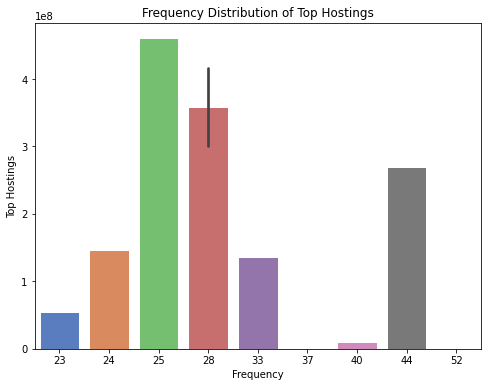

In [13]:

fig0, ax0 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Frequency', y=top_host.index, data=top_host, palette='muted')

# set the labels and title
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Top Hostings")
ax0.set_title("Frequency Distribution of Top Hostings")

# show the plot
plt.show()


Let's see what areas are the most popular in Great Toronto area

In [14]:
import matplotlib.pyplot as plt
freq_location = pd.DataFrame({'Frequency': df['neighbourhood'].value_counts().sort_values(),
                              'Percent': df['neighbourhood'].value_counts(normalize=True).sort_values() * 100})

print(freq_location)

                                   Frequency    Percent
Kingsway South                             5   0.042255
Rustic                                     6   0.050706
Edenbridge-Humber Valley                   9   0.076058
Morningside                               10   0.084509
Elms-Old Rexdale                          11   0.092960
...                                      ...        ...
Church-Yonge Corridor                    310   2.619792
Trinity-Bellwoods                        326   2.755007
Annex                                    366   3.093045
Niagara                                  463   3.912786
Waterfront Communities-The Island       2030  17.155413

[140 rows x 2 columns]


,Frequency,Percent
Waterfront Communities-The Island,2030,17.155413
Niagara,463,3.912786
Annex,366,3.093045
Trinity-Bellwoods,326,2.755007
Church-Yonge Corridor,310,2.619792
Moss Park,301,2.543734
Kensington-Chinatown,266,2.247951
Dovercourt-Wallace Emerson-Junction,265,2.239500
Bay Street Corridor,259,2.188794
South Riverdale,245,2.070481


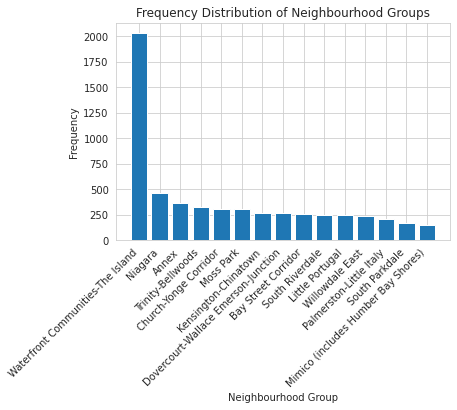

In [37]:
# sort freq_location in descending order by Frequency and select top 15 values
freq_location_sorted = freq_location.sort_values('Frequency', ascending=False)[:15]
display(freq_location_sorted)
#plot the frequency distribution
fig, ax = plt.subplots()

ax.bar(freq_location_sorted.index, freq_location_sorted['Frequency'], width=0.8, align='center')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Frequency')
# adjust the positions of the x-axis labels
plt.xticks(rotation=45, ha='right')

ax.set_title('Frequency Distribution of Neighbourhood Groups')
plt.show()

In [40]:
display(df['neighbourhood'])

0                          Little Portugal
1        Waterfront Communities-The Island
2        Waterfront Communities-The Island
4                        Woodbine Corridor
6                        Woodbine Corridor
                       ...                
16575    Waterfront Communities-The Island
16577    Waterfront Communities-The Island
16602        Kingsview Village-The Westway
16617                     Lansing-Westgate
16644                      High Park North
Name: neighbourhood, Length: 11833, dtype: object

What kind of room type is more popular than others?

In [16]:
freq_type = pd.DataFrame({
    'Frequency': airbnb_df['room_type'].value_counts(),
    'Percent': airbnb_df['room_type'].value_counts(normalize=True) * 100
})

# sort by frequency in ascending order
freq_type = freq_type.sort_values('Frequency')

# display the result
print(freq_type)

                 Frequency    Percent
Hotel room               3   0.025353
Shared room             84   0.709879
Private room          3855  32.578382
Entire home/apt       7891  66.686386


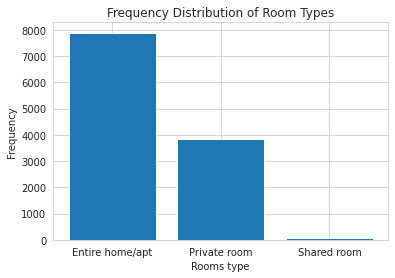

In [17]:
# sort frequency of room types in descending order by Frequency and select top 3 values
freq_type_sorted = freq_type.sort_values('Frequency', ascending=False)[:3]

#plot the frequency histogram distribution
fig1, ax1 = plt.subplots()

ax1.bar(freq_type_sorted.index, freq_type_sorted['Frequency'], width=0.8, align='center')
ax1.set_xlabel('Rooms type')
ax1.set_ylabel('Frequency')

ax1.set_title('Frequency Distribution of Room Types')
plt.show()

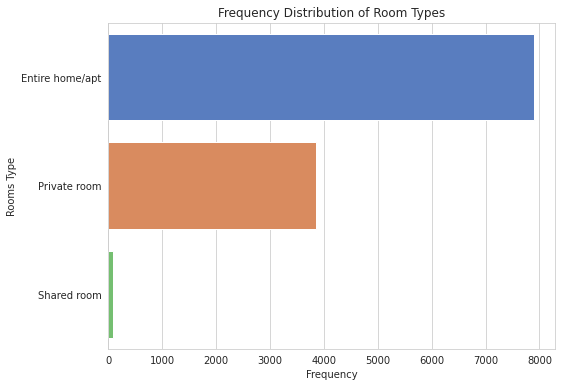

In [18]:
# create bar plot
fig1_1, ax1_1 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Frequency', y=freq_type_sorted.index, data=freq_type_sorted, palette='muted')

# set the labels and title
ax1_1.set_xlabel("Frequency")
ax1_1.set_ylabel("Rooms Type")
ax1_1.set_title("Frequency Distribution of Room Types")

# show the plot
plt.show()


We also should know what are the acceptable price for customers.

In [29]:
#change the type of price
print(airbnb_df['price'].dtype)

airbnb_df['price'] = airbnb_df['price'].astype(str)
airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')

airbnb_df['price'] = airbnb_df['price'].astype(float)
print(airbnb_df['price'])

float64
0        469.0
1        101.0
2        125.0
4         37.0
6         37.0
         ...  
11805      NaN
11806      NaN
11810      NaN
11817      NaN
11822      NaN
Name: price, Length: 14395, dtype: float64


<ipython-input-29-ef471ccecb45>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')


In [20]:
bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
bin_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-600', '600-700', '700-800', '800-900', '900-1000']

# Create a new column for price bin
airbnb_df['price_bin'] = pd.Series(dtype='object')

# Iterate through each price value and assign the appropriate bin label
for i, price in enumerate(airbnb_df['price']):
    for j, bin_edge in enumerate(bin_edges[:-1]):
        if price >= bin_edge and price < bin_edges[j+1]:
            airbnb_df.loc[i, 'price_bin'] = bin_labels[j]
            break

freq_price = pd.DataFrame({
    'Frequency': airbnb_df['price_bin'].value_counts(),
    'Percent': airbnb_df['price_bin'].value_counts(normalize=True) * 100
})

# sort by frequency in ascending order
freq_type = freq_price.sort_values('Frequency')
# Check the frequency distribution of price bins
display(freq_price)


,Frequency,Percent
50-100,3570,30.507606
100-150,2564,21.910784
150-200,1653,14.125790
0-50,1096,9.365920
200-250,985,8.417365
250-300,622,5.315331
300-350,377,3.221672
350-400,246,2.102205
400-450,147,1.256196
500-600,133,1.136558


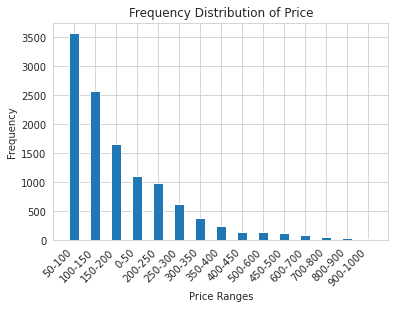

In [21]:
# sort frequency of price frequency in descending order by Frequency and select top 15 values
freq_price_sorted = freq_price.sort_values('Frequency', ascending=False)[:15]

#plot the frequency histogram distribution
fig2, ax2 = plt.subplots()

ax2.bar(freq_price_sorted.index, freq_price_sorted['Frequency'], width=0.5, align='center')
ax2.set_xlabel('Price Ranges')
ax2.set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
ax2.set_title('Frequency Distribution of Price')
plt.show()

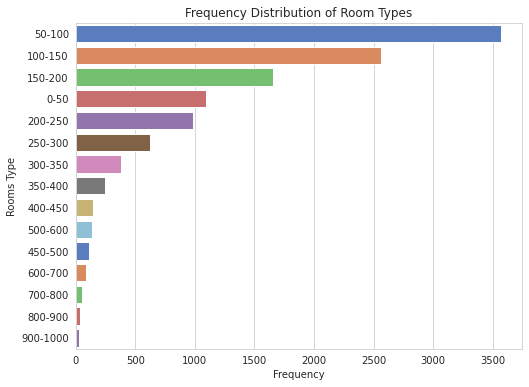

In [22]:
#create bar plot
fig2_1, ax2_1 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Frequency', y=freq_price_sorted.index, data=freq_price_sorted, palette='muted')

# set the labels and title
ax2_1.set_xlabel("Frequency")
ax2_1.set_ylabel("Rooms Type")
ax2_1.set_title("Frequency Distribution of Room Types")

# show the plot
plt.show()


What is the distribution of prices in different regions?

In [50]:
#let's find out more about our neiberhoods presented 'Waterfront Communities-The Island', 'Niagara', 'Annex', 'Trinity-Bellwoods', and 'Church-Yonge Corridor'

# display(airbnb_df['price'])
# display(airbnb_df['neighbourhood_cleansed'])

#Waterfront Communities-The Island

sub_1=airbnb_df.loc[airbnb_df['neighbourhood_cleansed'] == 'Waterfront Communities-The Island']
price_sub1=sub_1[['price']]

#Niagara
sub_2=airbnb_df.loc[airbnb_df['neighbourhood_cleansed'] == 'Niagara']
price_sub2=sub_2[['price']]

#Annex
sub_3=airbnb_df.loc[airbnb_df['neighbourhood_cleansed'] == 'Annex']
price_sub3=sub_3[['price']]

#Trinity-Bellwoods
sub_4=airbnb_df.loc[airbnb_df['neighbourhood_cleansed'] == 'Trinity-Bellwoods']
price_sub4=sub_4[['price']]

#Church-Yonge Corridor
sub_5=airbnb_df.loc[airbnb_df['neighbourhood_cleansed'] == 'Church-Yonge Corridor']
price_sub5=sub_5[['price']]

#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

display(price_list_by_n)

[       price
 1      101.0
 2      125.0
 9      300.0
 10     135.0
 36     130.0
 ...      ...
 16514  271.0
 16527  203.0
 16528  216.0
 16575  229.0
 16577  166.0
 
 [2030 rows x 1 columns],        price
 35      55.0
 38      45.0
 42      45.0
 44      50.0
 55     249.0
 ...      ...
 15975  178.0
 16087  239.0
 16120  185.0
 16223  211.0
 16330  180.0
 
 [463 rows x 1 columns],        price
 62     125.0
 96     210.0
 98      75.0
 111     70.0
 179     88.0
 ...      ...
 15653  125.0
 15868  113.0
 15983  549.0
 16112  279.0
 16272  239.0
 
 [366 rows x 1 columns],        price
 103     59.0
 170    300.0
 182    144.0
 238    121.0
 243    449.0
 ...      ...
 15837  110.0
 15894   72.0
 15896   64.0
 16070   73.0
 16334  120.0
 
 [326 rows x 1 columns],        price
 32     140.0
 46     140.0
 48     178.0
 70      95.0
 76     219.0
 ...      ...
 15149  856.0
 15312  125.0
 15364  275.0
 15973  325.0
 16277  123.0
 
 [310 rows x 1 columns]]

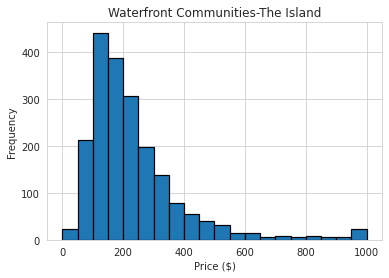

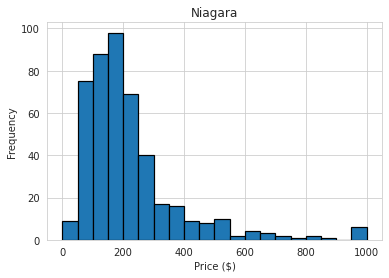

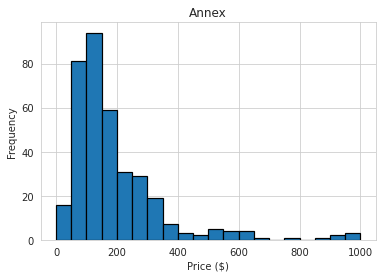

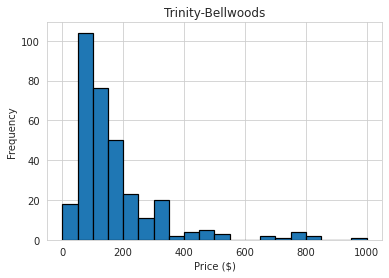

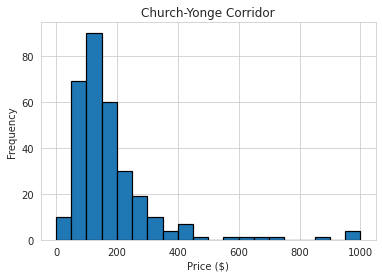

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# create a list of region names and their corresponding neighbourhoods
regions = {'Waterfront Communities-The Island': ['Waterfront Communities-The Island'],
           'Niagara': ['Niagara'],
           'Annex': ['Annex'],
           'Trinity-Bellwoods': ['Trinity-Bellwoods'],
           'Church-Yonge Corridor': ['Church-Yonge Corridor']}

# loop over the regions and calculate price frequencies
for region in regions.keys():
    # filter price data by neighbourhoods
    price_data = airbnb_df.loc[airbnb_df['neighbourhood_cleansed'] == region, ['price']]
    
    # match the prices with the corresponding region
    region_prices = []
    for price in price_data['price']:
        region_prices.append((region, price))
    sorted_prices = sorted(region_prices, key=lambda x: x[1])
    
    # plot histogram of price frequencies
    fig, ax = plt.subplots()
    ax.hist([p[1] for p in sorted_prices], bins=20, range=(0, 1000), edgecolor='black', linewidth=1.2)
    ax.set_title(region)
    ax.set_xlabel('Price ($)')
    ax.set_ylabel('Frequency')
    plt.show()
